In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [2]:
# Reading the dataset
df=pd.read_csv('cardekho_data.csv')

In [3]:
# Shape of df
df.shape

(301, 9)

In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Checking Unique values for following features
print(df.Fuel_Type.unique())
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Owner.unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [7]:
df['no_of_year']=2023-df['Year']

In [8]:
df.drop(['Car_Name','Year'],axis=1,inplace=True)

In [9]:
# One Hot Encoding
df=pd.get_dummies(df)

In [10]:
df.drop(['Fuel_Type_CNG','Seller_Type_Individual','Transmission_Automatic'],axis=1,inplace=True)

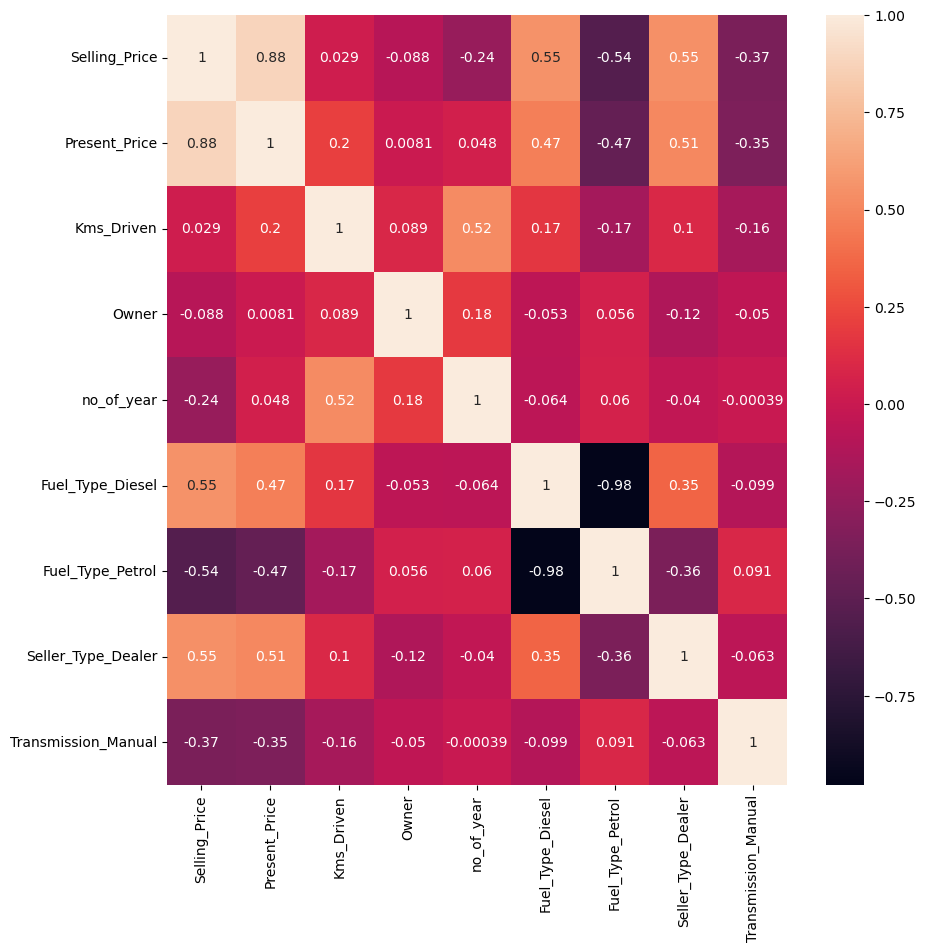

In [11]:
# checking correlations
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

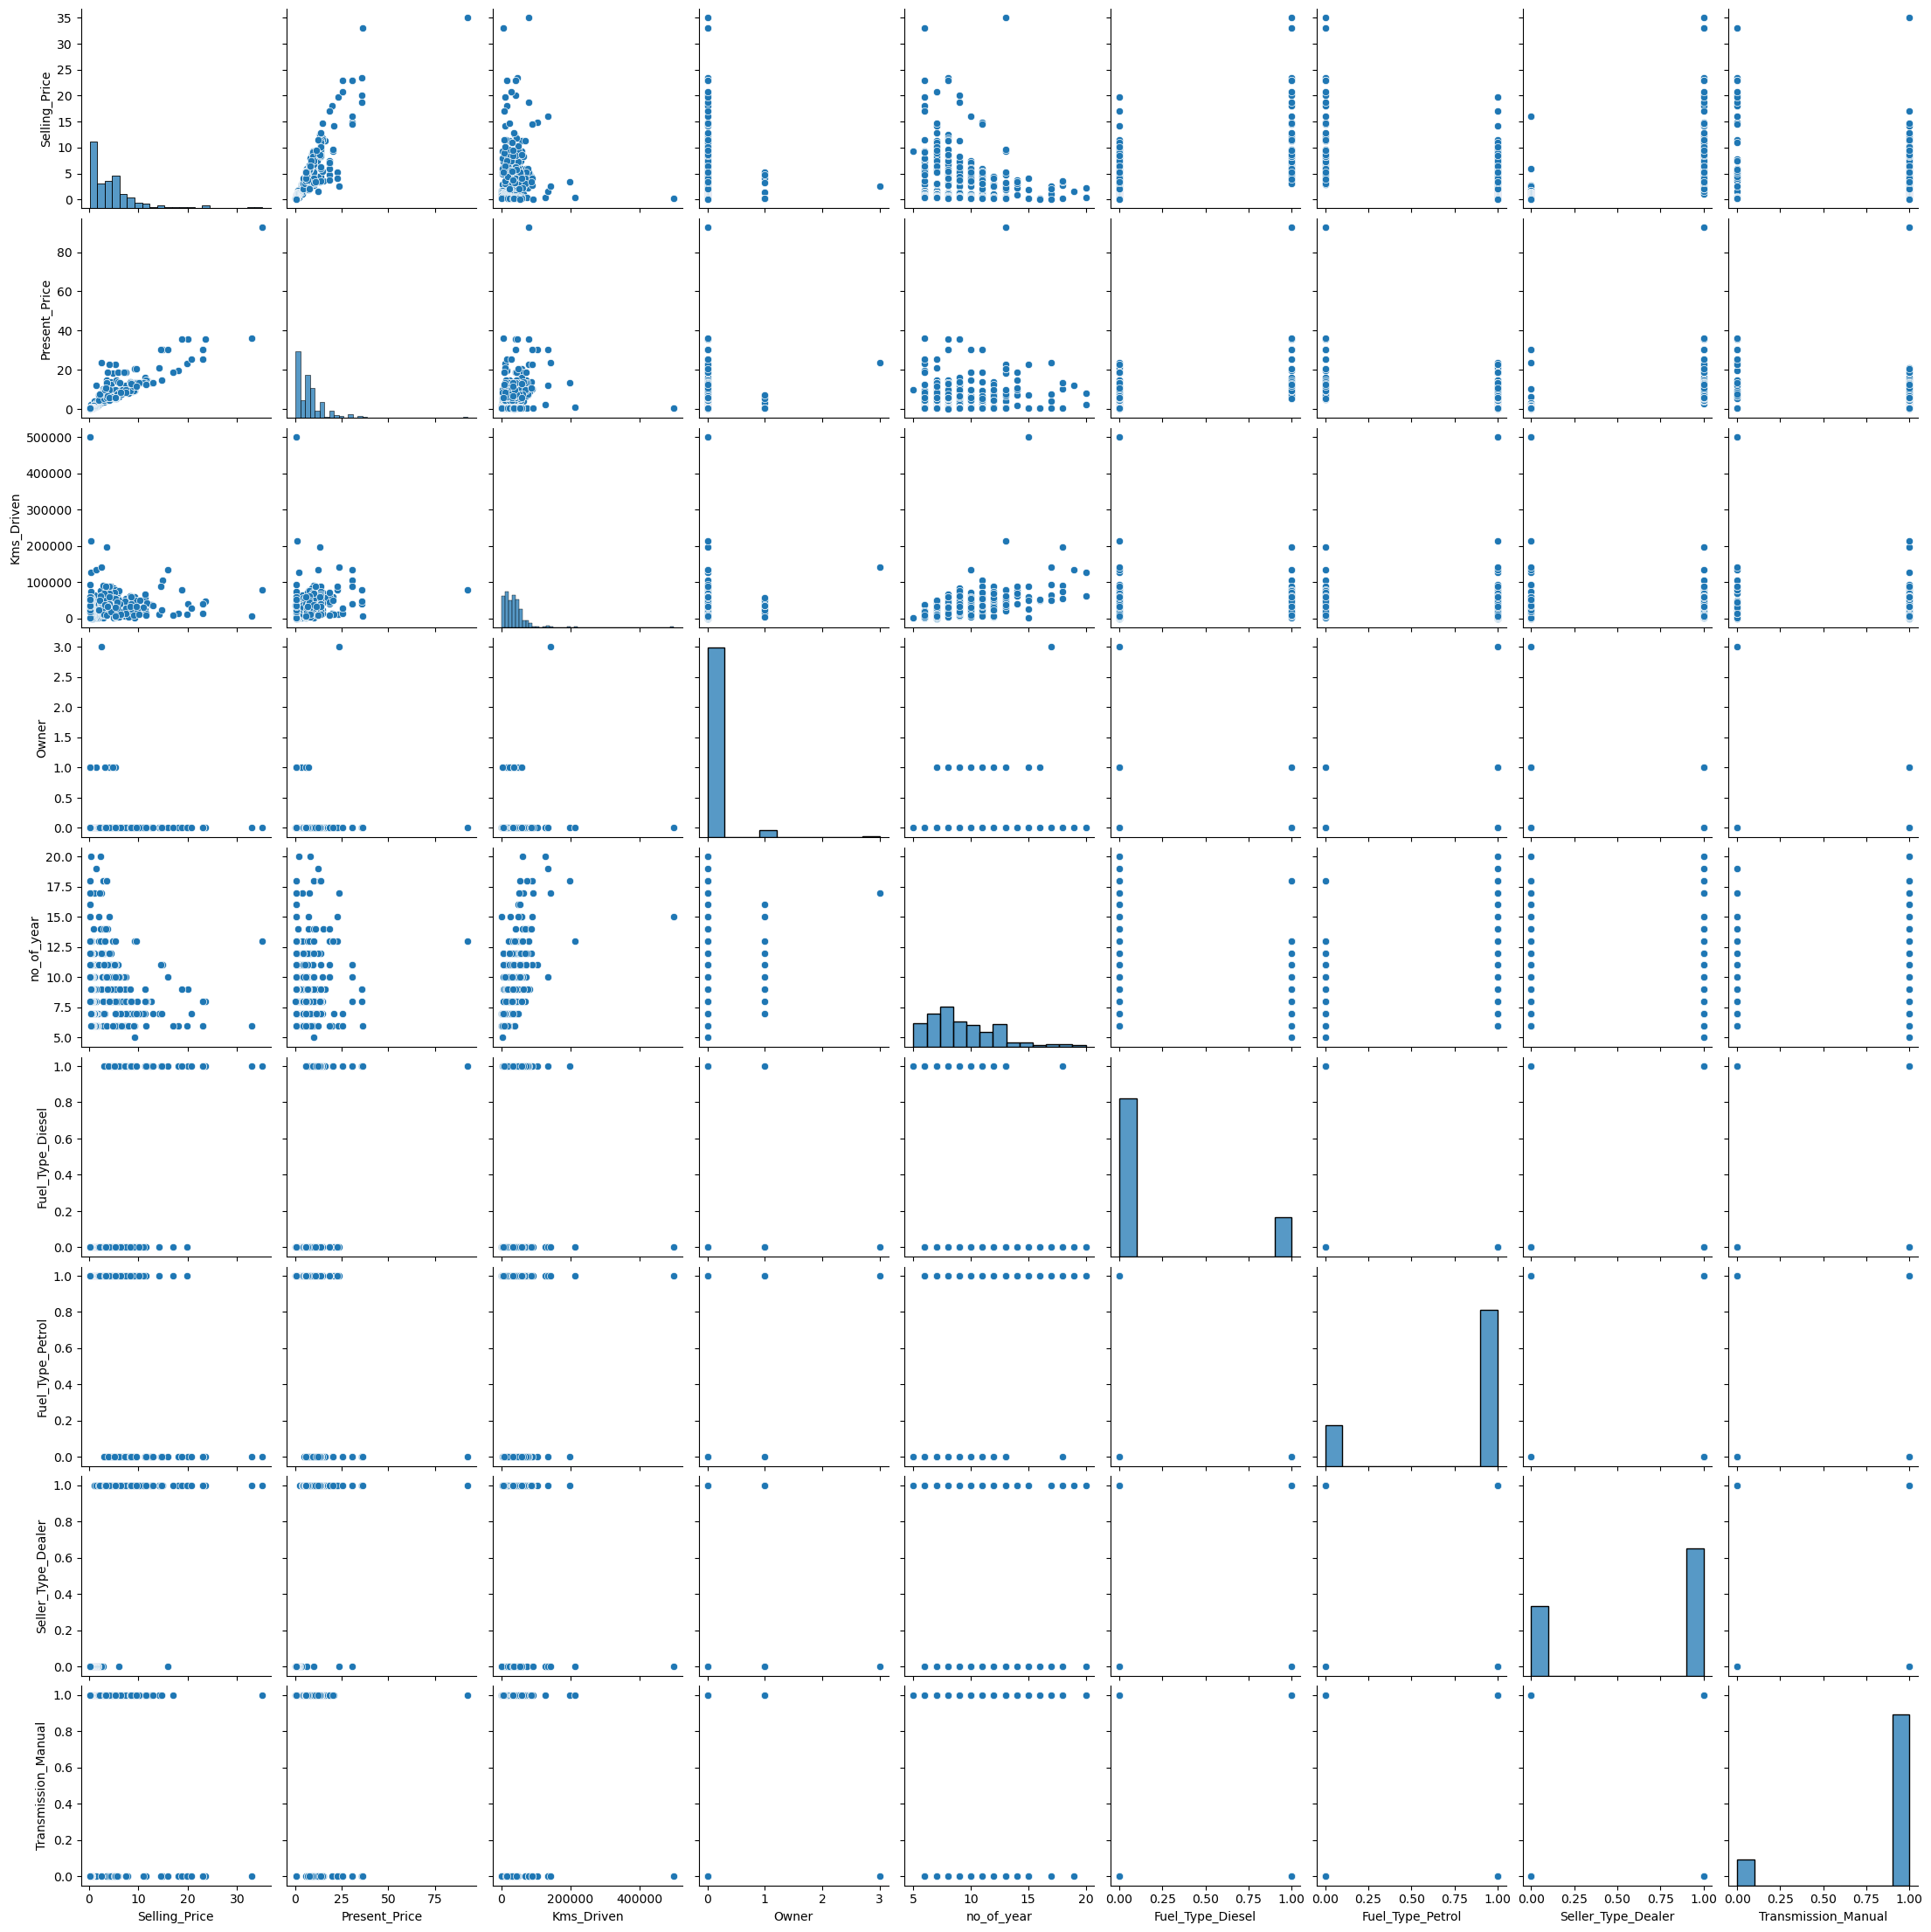

In [12]:
sns.pairplot(df)

In [13]:
X=df.drop('Selling_Price',axis=1)
y=df.Selling_Price

In [14]:
#Feature selection
from sklearn.ensemble import ExtraTreesRegressor 

In [15]:
mod1=ExtraTreesRegressor()

In [16]:
z=mod1.fit(X,y)
z.feature_importances_

array([0.37803591, 0.04597407, 0.0008779 , 0.07240839, 0.23151226,
       0.01126442, 0.12929872, 0.13062833])

In [17]:
imp=pd.Series(z.feature_importances_,index=X.columns)

<AxesSubplot:>

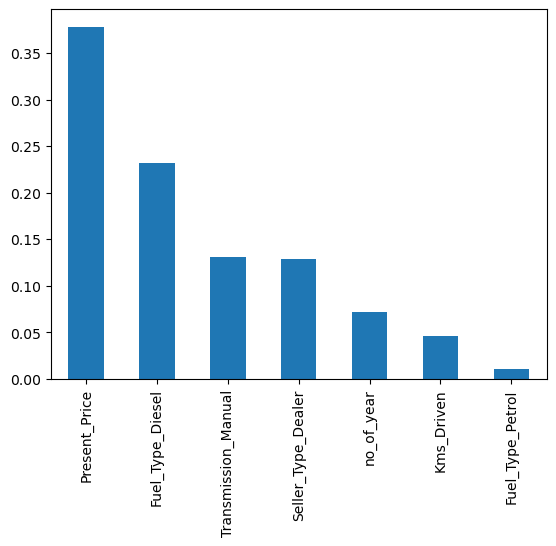

In [18]:
# Top 7 features
imp.nlargest(7).plot(kind='bar')

In [19]:
# Splitting the datasets to training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
mod2=RandomForestRegressor()

# Hyper Parameter Tuning

In [21]:
# Choosing the parameters
n_estimators=[int(i) for i in np.linspace(start=100,stop=1500,num=15)]
max_features=["auto","sqrt"]
max_depth=[int(i) for i in np.linspace(start=5,stop=50,num=10)]
min_samples_split=[2,5,10,20,50,100]
min_samples_leaf=[1,2,5,10,40,100]

In [22]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [23]:
# Use RandomizedSearchCV for finding best parameters
from sklearn.model_selection import RandomizedSearchCV
rf=RandomizedSearchCV(estimator=mod2,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=5,verbose=2,random_state=42,n_jobs=1)

In [24]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1100; total time=   2.0s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1100; total time=   2.1s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1100; total time=   1.5s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1100; total time=   2.1s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1100; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=600; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=600; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_e

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 40,
                                                             100],
                                        'min_samples_split': [2, 5, 10, 20, 50,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [25]:
# Best parameters to choose
rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [26]:
model=RandomForestRegressor(n_estimators=200,max_depth=25,max_features='auto',min_samples_leaf=2,min_samples_split=5)

In [27]:
# Training
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200)

In [28]:
# Predicting
y_pred=model.predict(X_test)

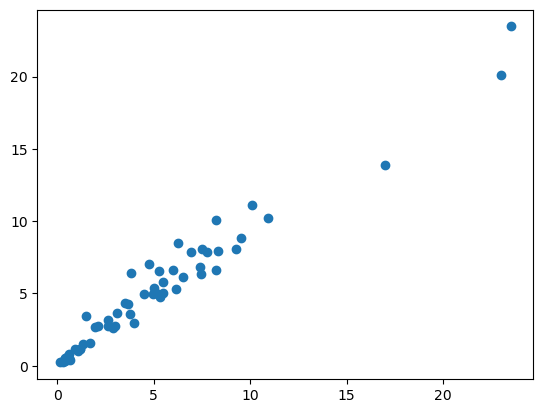

In [29]:
plt.scatter(y_test,y_pred)

In [30]:
df_final=pd.DataFrame({"ACTUAL":y_test,"PRED":y_pred})

<AxesSubplot:>

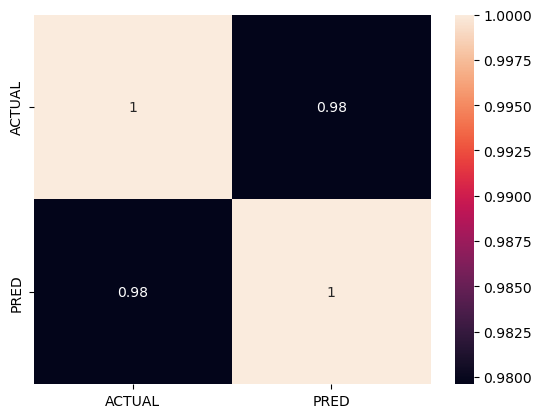

In [31]:
sns.heatmap(df_final.corr(),annot=True)

In [32]:
# Accuracy
r2_score(y_test,y_pred)

0.9577067604277395